In [1]:
import random
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from fermat import Fermat

Reading mnist data form https://www.kaggle.com/oddrationale/mnist-in-csv#mnist_train.csv

In [2]:
labels = []
data = []
with open('data/mnist_train.csv', 'r') as f:
    for l in f.readlines():
        row = l[:-1].split(',')
        labels.append(row[0])
        data.append([float(x)/255 for x in row[1:]])

In [3]:
test_size = 1000
sample_qty = 100

In [4]:
sample = random.Random(42).sample(range(test_size), sample_qty)

In [5]:
distances = distance_matrix(data[:test_size], data[:test_size])

In [6]:
f = Fermat(4, path_method='L', k=30, landmarks=30)

In [7]:
f.fit(np.matrix(distances))

In [8]:
def plot_figure(data,S,s_labels, xlabel):
    plt.figure(figsize=(20, 10))
    plt.xlabel(xlabel, fontsize='large')
    for digit in range(10):
        xs = [data[i, 0] for i in range(S) if s_labels[i] == str(digit)]
        ys = [data[i, 1] for i in range(S) if s_labels[i] == str(digit)]
        plt.plot(xs, ys, 'o', label=str(digit))
    plt.legend(numpoints=1)

In [9]:
tsne = TSNE(n_components=2, perplexity=60, n_iter=1000)

In [10]:
tsne_euclidean = tsne.fit_transform(distances)

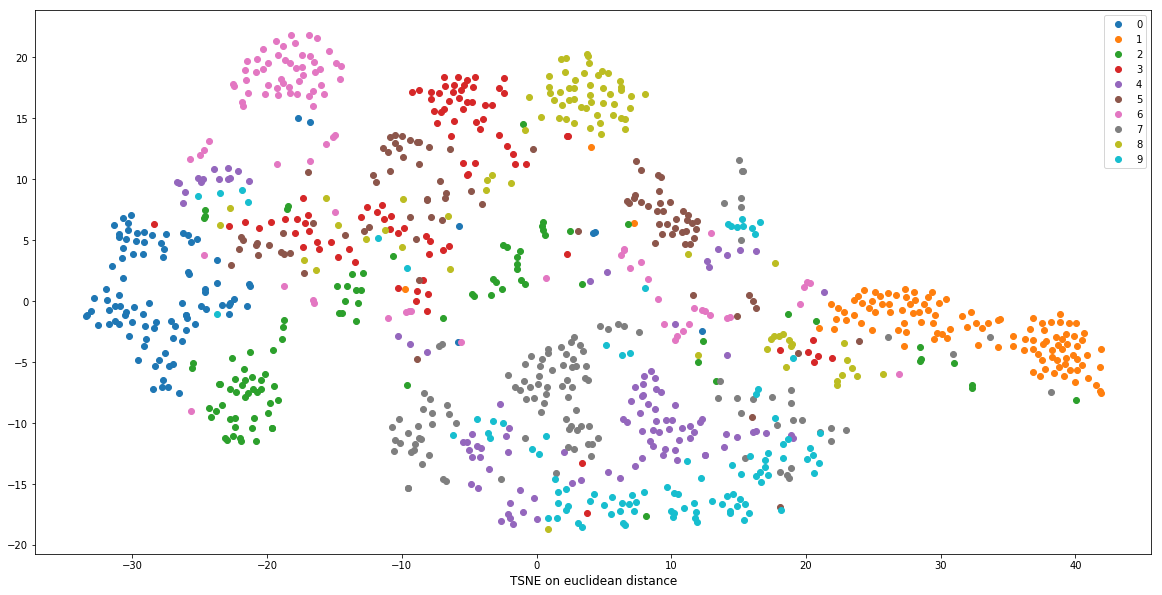

In [11]:
plot_figure(tsne_euclidean, test_size, labels[:test_size], "TSNE on euclidean distance")


In [12]:
tsne_fermat = tsne.fit_transform(f.get_distances())

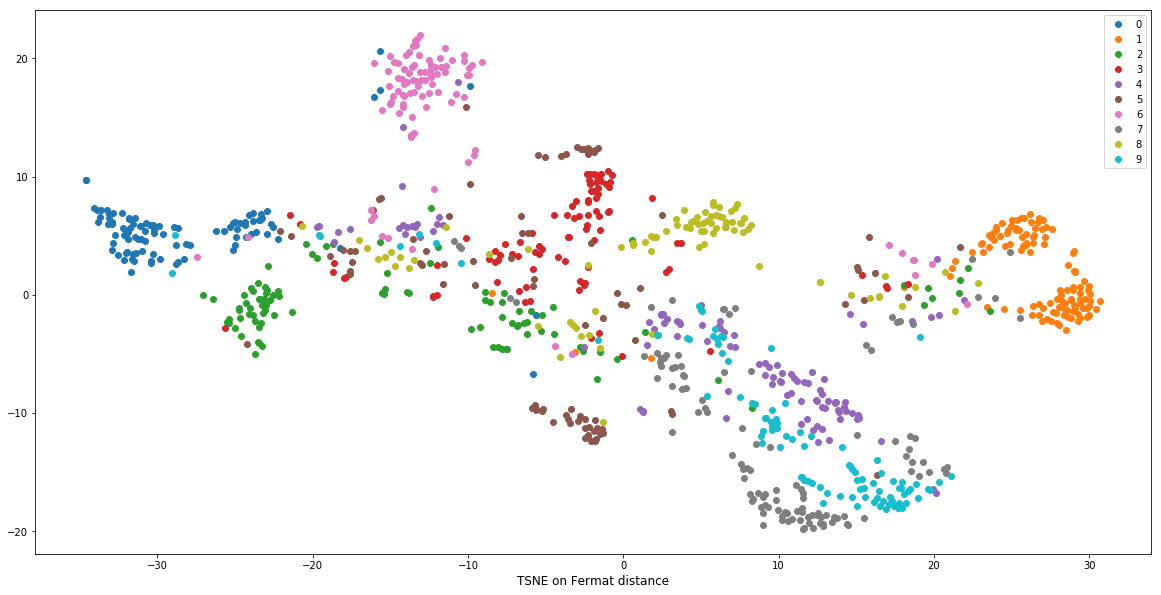

In [13]:
plot_figure(tsne_fermat, test_size, labels[:test_size], "TSNE on Fermat distance") 